# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
      

* [GAN](#GAN)
    * [DCGAN](#DCGAN)
        * [Generator](#Generator)
        * [Discriminator](#Discriminator)


---
## GAN
- Generative Adversarial network
- 적대적으로 경쟁해서 생성하는 네트워크
### generative model
 - 각 데이터의 확률분포를 추정하고 분포를 기반으로한 새로운 데이터 분류/생성
  > - autoencoder 고차원 데이터를 저차원으로 축소한것이 고유의 특성을 찾았어서 생성에 활용

### Generative Adversarial Network
- 실제처럼 만들고 구분할 수 있도록 서로 **적대적 경쟁(Adversarial)시키면서 발전**

### 학습 테크닉 정리
GAN 학습이 힘듦

- overfitting 막는 방법
  - 데이터 확보

  - 데이터 전처리
    - normalization : 0 ~ 1, -1 ~ 1 
  - 모델 단순화
    - feature 수 줄이기:
      - feature selection
        1. filter
        2. wrapper
        3. embeded
      - dimensionality reduction
    - regularizer (weight decay)
  - ensemble
    - dropout
  - early stopping

- **underfitting** 막는 방법
  - Normalization
    - BN 
    - layer
    - instance
    - weight 
  - ReLU, Leacky ReLU
  - initializer
  - gradient clipping
  - optimizer
  - learning rate decay


### DCGAN
- Deep Convolutional GAN
- simple - deep -cnvolution 

- gradientTape
    - 모델 나누어서
-  Leacky ReLU
    intro to DL (MIT vs Stanford)
    
TensorFlow DCGAN 참고: https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko

In [1]:
import tensorflow as tf

In [2]:
(X_train, y_train),(_,_) =tf.keras.datasets.mnist.load_data() #overfitting 검증할 필요가 없어서 train만 사용

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train=X_train.reshape(-1,28,28,1) #3차원

데이터 전처리
- 정규화 : 0 ~ 1, -1 ~ 1 ( zero-centered)
    - [-1,1] 정규화

In [4]:
X_train=( X_train- 255/2) /(255/2) #zero-centered 

In [5]:
BATCH_SIZE = 256
train= tf.data.Dataset.from_tensor_slices(X_train).batch(BATCH_SIZE) 

모델을 generator , discriminator나누어서 모델 만듦
### Generator
- BatchNormalization
- LeakyReLU
- Conv2DTranspose
-  use_bias=False 
- 갯수 맞추기위해서 padding='same'

In [13]:
NOISE_DIM=100

def make_generative_model(): #함수로 재활용
  generative_model= tf.keras.models.Sequential([ #첫번째 convolution갯수 맞춰야함
                                                tf.keras.layers.Dense(7*7*256,input_shape=(NOISE_DIM,),use_bias=False),
                                                tf.keras.layers.BatchNormalization(),
                                                tf.keras.layers.LeakyReLU(),
                                                
                                                tf.keras.layers.Reshape((7, 7, 256)),#convolution형태

                                                tf.keras.layers.Conv2DTranspose(128,(5,5),padding='same',use_bias=False) , 
                                                tf.keras.layers.BatchNormalization(),
                                                tf.keras.layers.LeakyReLU(),

                                                tf.keras.layers.Conv2DTranspose(128,(5,5),padding='same', strides=2,use_bias=False) ,
                                                tf.keras.layers.BatchNormalization(),
                                                tf.keras.layers.LeakyReLU(),
                                                #마지막 레이어 1 
                                                tf.keras.layers.Conv2DTranspose(1,(5,5),padding='same',strides=2,use_bias=False) , # vgg (3,3),(5,5)
                                                tf.keras.layers.BatchNormalization(),
                                                tf.keras.layers.LeakyReLU(),
                                                ])
  return generative_model

In [14]:
generator= make_generative_model()

generator.summary() #28x28x1로 맞춤

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)        

- sequential로 하면 list이기 때문에 model에 레이어 하나씩 추가해서 assert 참이 아니면 에러를 발생시켜서 확인

In [7]:
a=1
assert a==2

AssertionError: ignored

In [8]:
7*7*256 #크기 꼭 맞춰야됨...

12544

- 아직 훈련되지 않은 generator가 이미지 생성


In [15]:
img=generator(tf.random.normal([1,100])) 
img.numpy().reshape(1,28,28) 

array([[[ 1.92821247e-03, -1.89562605e-04,  3.23843487e-05,
          2.74822069e-03,  7.99591746e-03, -8.92840384e-04,
          1.10335553e-04,  5.01927687e-03,  9.27320123e-03,
         -6.38830010e-04,  2.51494488e-03,  3.93840391e-03,
          7.51121435e-03, -2.58055981e-03,  6.60296017e-03,
          4.80051246e-03,  9.38823447e-03,  2.29550689e-03,
          9.14195646e-03, -4.94459762e-08,  5.74209914e-03,
         -1.56374357e-03,  1.18985474e-02,  3.52874584e-03,
         -9.91399167e-04, -5.89414558e-04,  2.41298461e-03,
          3.79810971e-03],
        [-4.92327090e-04, -9.02793603e-04, -2.03953823e-03,
         -1.43754529e-03, -5.83510438e-04, -1.04212516e-03,
          1.62379742e-02, -3.98835022e-04,  1.00268656e-02,
         -2.53691827e-03,  2.94715888e-03,  1.64132845e-02,
          5.60334418e-03, -3.39009729e-03, -1.46871188e-03,
         -1.86229637e-03,  1.69436466e-02, -5.66716213e-03,
         -3.12698772e-04, -3.95422801e-03,  1.32316537e-02,
         -5.2

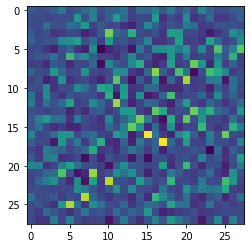

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img.numpy().reshape(28,28)) 

### Discriminator
- 번갈아가면서 학습시켜서 진짜인지 구분 가능하는 능력을 키움
- CNN기반 분류기


In [17]:
discriminator= tf.keras.models.Sequential([
                                           tf.keras.layers.Conv2D(64,(5,5),input_shape=(28,28,1)),
                                           tf.keras.layers.LeakyReLU(),
                                           tf.keras.layers.Dropout(0.3),

                                           tf.keras.layers.Conv2D(128,(5,5)),
                                           tf.keras.layers.LeakyReLU(),
                                           tf.keras.layers.Dropout(0.3),

                                           tf.keras.layers.Flatten(),
                                           tf.keras.layers.Dense(1) #prediction                       
                                           ])

In [18]:
discriminator.summary() #구성

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 128)       204928    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 20, 20, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 51200)            

훈련되지않은 discriminator 사용하여 판별
- 음수 :가짜
- 양수 :진짜

In [19]:
discriminator(img)  #아직 학습 안해서 생성자의 이미지를 판단 능력 없음

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00010934]], dtype=float32)>

In [20]:
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True) # functional paradigm
#문자열,함수,객체-재활용

In [22]:
#loss 2개 만들어서 사용
def discriminator_loss(real,fake):
  real_loss= loss(tf.ones_like(real),real)
  fake_loss= loss(tf.zeros_like(fake),fake)
  
  total_loss=real_loss+fake_loss
  return total_loss

In [31]:
def generative_loss(fake):
  return loss(tf.zeros_like(fake),fake)

### optimizer
- 감별자와 생성자는 따로 훈련되서 2개

In [26]:
optimizer_g=tf.keras.optimizers.Adam( )
optimizer_d=tf.keras.optimizers.Adam() 

- GradientTape: for 이용해서 epoch별 batch size만큼

In [23]:
NOISE_DIM=100
noise =tf.random.normal([BATCH_SIZE,NOISE_DIM])
real=X_train

이전에는 수동으로했으나 이제는 동시에 두 모델 실행

In [34]:
@tf.function
def train_step(real):
  with tf.GradientTape() as G, tf.GradientTape() as D: #알아서 순차적 실행 
    #training학습여부 조절
    imgs=generator(noise,training=True)  #뱃치사이즈 만큼 이미지 만듦

    real_img=discriminator(real, training=True)
    fake_img=discriminator(imgs, training=True) #제너레이터가만든 이미지

    gen_loss=generative_loss(fake_img)
    dis_loss=discriminator_loss(real_img, fake_img)

  gd=G.gradient(gen_loss,generator.trainable_variables)
  dd=D.gradient(dis_loss,discriminator.trainable_variables)
# print(gd)
  optimizer_g.apply_gradients(zip(gd,generator.trainable_variables) )
  optimizer_d.apply_gradients(zip(dd,discriminator.trainable_variables) )

In [44]:
#tf에서 17시간 15분 학습...
for e in range(20): #10 epochs
  for i in train:
    train_step(i)

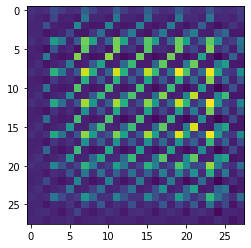

In [45]:
img=generator(tf.random.normal([1,100]))
plt.imshow(img.numpy().reshape(28,28))  #여러번 학습하면 패턴의 대칭이 점점 깨지기 시작

In [46]:
discriminator(img) 

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-29.158497]], dtype=float32)>

In [36]:
#디버깅용
for i in train:
  train_step(i)
  break

간단한 데이터에서도 학습이 잘 안됨

    - trainable=True/False 이용해서 학습시 weight update 여부 조절
- 모델의 training 옵션 으로 조절 
        > * `training`: Boolean scalar tensor of Python boolean indicatingㅠ whether the `call` is meant for training or inference    

In [ ]:
import inspect
print(inspect.getsource(descriminator.__call__)) #소스 코드 

  def __call__(self, *args, **kwargs):
    """Wraps `call`, applying pre- and post-processing steps.

    Arguments:
      *args: Positional arguments to be passed to `self.call`.
      **kwargs: Keyword arguments to be passed to `self.call`.

    Returns:
      Output tensor(s).

    Note:
      - The following optional keyword arguments are reserved for specific uses:
        * `training`: Boolean scalar tensor of Python boolean indicating
          whether the `call` is meant for training or inference.
        * `mask`: Boolean input mask.
      - If the layer's `call` method takes a `mask` argument (as some Keras
        layers do), its default value will be set to the mask generated
        for `inputs` by the previous layer (if `input` did come from
        a layer that generated a corresponding mask, i.e. if it came from
        a Keras layer with masking support.

    Raises:
      ValueError: if the layer's `call` method returns None (an invalid value).
      RuntimeError: if 